# Setting Up Kaggle Environment and Downloading Road Sign Dataset

In [5]:
import os

# Ensure Kaggle directory exists
kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Copy kaggle.json to the right location
import shutil
shutil.copy('kaggle.json', kaggle_dir)

# Install Kaggle API client
!pip install kaggle

# Set the environment variable for Kaggle
os.environ["KAGGLE_CONFIG_DIR"] = kaggle_dir

# Use Kaggle API to download dataset
!kaggle datasets download -d andrewmvd/road-sign-detection

# Unzip the dataset
import zipfile
with zipfile.ZipFile('road-sign-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Rename the annotations folder to labels
if os.path.exists('./data/annotations'):
    os.rename('./data/annotations', './data/labels')



  0%|          | 0.00/218M [00:00<?, ?B/s]
  0%|          | 1.00M/218M [00:03<12:18, 308kB/s]
  1%|          | 2.00M/218M [00:05<10:04, 375kB/s]
  1%|1         | 3.00M/218M [00:08<10:00, 375kB/s]
  2%|1         | 4.00M/218M [00:11<10:21, 361kB/s]
  2%|2         | 5.00M/218M [00:13<09:02, 412kB/s]
  3%|2         | 6.00M/218M [00:15<07:55, 467kB/s]
  3%|3         | 7.00M/218M [00:16<07:03, 523kB/s]
  4%|3         | 8.00M/218M [00:18<06:29, 565kB/s]
  4%|4         | 9.00M/218M [00:20<07:04, 517kB/s]
  5%|4         | 10.0M/218M [00:22<06:52, 529kB/s]
  5%|5         | 11.0M/218M [00:24<06:59, 517kB/s]
  6%|5         | 12.0M/218M [00:27<07:48, 461kB/s]
  6%|5         | 13.0M/218M [00:29<07:49, 458kB/s]
  6%|6         | 14.0M/218M [00:33<08:57, 398kB/s]
  7%|6         | 15.0M/218M [00:36<09:45, 364kB/s]
  7%|7         | 16.0M/218M [00:40<10:15, 344kB/s]
  8%|7         | 17.0M/218M [00:43<10:52, 323kB/s]
  8%|8         | 18.0M/218M [00:48<11:49, 296kB/s]
  9%|8         | 19.0M/218M [00:50<10:

# Cloning the YOLOv5 Repository

In [6]:
import git

# Define the repository & directory
repo_url = 'https://github.com/ultralytics/yolov5'
destination_directory = './yolov5'

# Clone the repo
if not os.path.exists(destination_directory):
    git.Repo.clone_from(repo_url, destination_directory)


# Importing Annotation Conversion Function

In [7]:
# Import the function 'convert_voc_to_yolo' from the 'preprocessing' module. 
# This function will be used to convert Pascal VOC format annotations to the YOLO format.
from preprocessing import convert_voc_to_yolo

# Executing VOC to YOLO Annotation Conversion

In [8]:
convert_voc_to_yolo()

# Copying the YOLO Configuration File

In [9]:
%%bash
# Copy the VOC.yaml configuration file from the 'data' directory inside 'yolov5' to the root of the 'yolov5' directory.
# cp (copy command) is used to copy files or directories in Unix/Linux.
cp yolov5/data/VOC.yaml yolov5/VOC.yaml


In [10]:
# # Write out this YAML
# path: ../data
# train: # train images (relative to 'path')  16551 images
#   - images
# val: # val images (relative to 'path')  4952 images
#   - images

# # Classes
# names:
#   0: trafficlight
#   1: speedlimit
#   2: crosswalk
#   3: stop

# Importing Essential Libraries

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

# Training the Model

In [13]:
# Change the current working directory to 'yolov5'
%cd yolov5

# Execute the training script 'train.py' inside the 'yolov5' directory with specified parameters:
# --img 320:       Use images resized to 320x320 pixels for training.
# --batch 16:      Use a batch size of 16 images during training.
# --epochs 500:    Train the model for 500 epochs.
# --data customVOC.yaml:   Use the 'customVOC.yaml' file for dataset configuration (paths, classes, etc.).
# --weights yolov5s.pt:    Initialize training using the weights from the 'yolov5s.pt' model (small version of YOLOv5).
# --workers 2:     Use 2 worker threads for data loading.
!python train.py --img 320 --batch 16 --epochs 50 --data VOC.yaml --weights yolov5s.pt --workers 2


D:\projects\Road Sign Detection\yolov5
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: cannot change to 'D:\projects\Road': No such file or directory
YOLOv5  2023-10-12 Python-3.11.0 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scal

# Loading the Custom YOLOv5 Model from Weights

In [3]:
model = torch.hub.load('ultralytics/yolov5',  # GitHub repository where the model is located
                       'custom',              # Specify custom model (i.e., a model not part of the default YOLOv5 models)
                       path='yolov5/runs/train/exp/weights/last.pt',  # Path to your custom model weights
                       force_reload=True)     # Force a reload of the model if it was loaded before


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hafee/.cache\torch\hub\master.zip
YOLOv5  2023-10-13 Python-3.11.0 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Visualizing Detections on Random Images

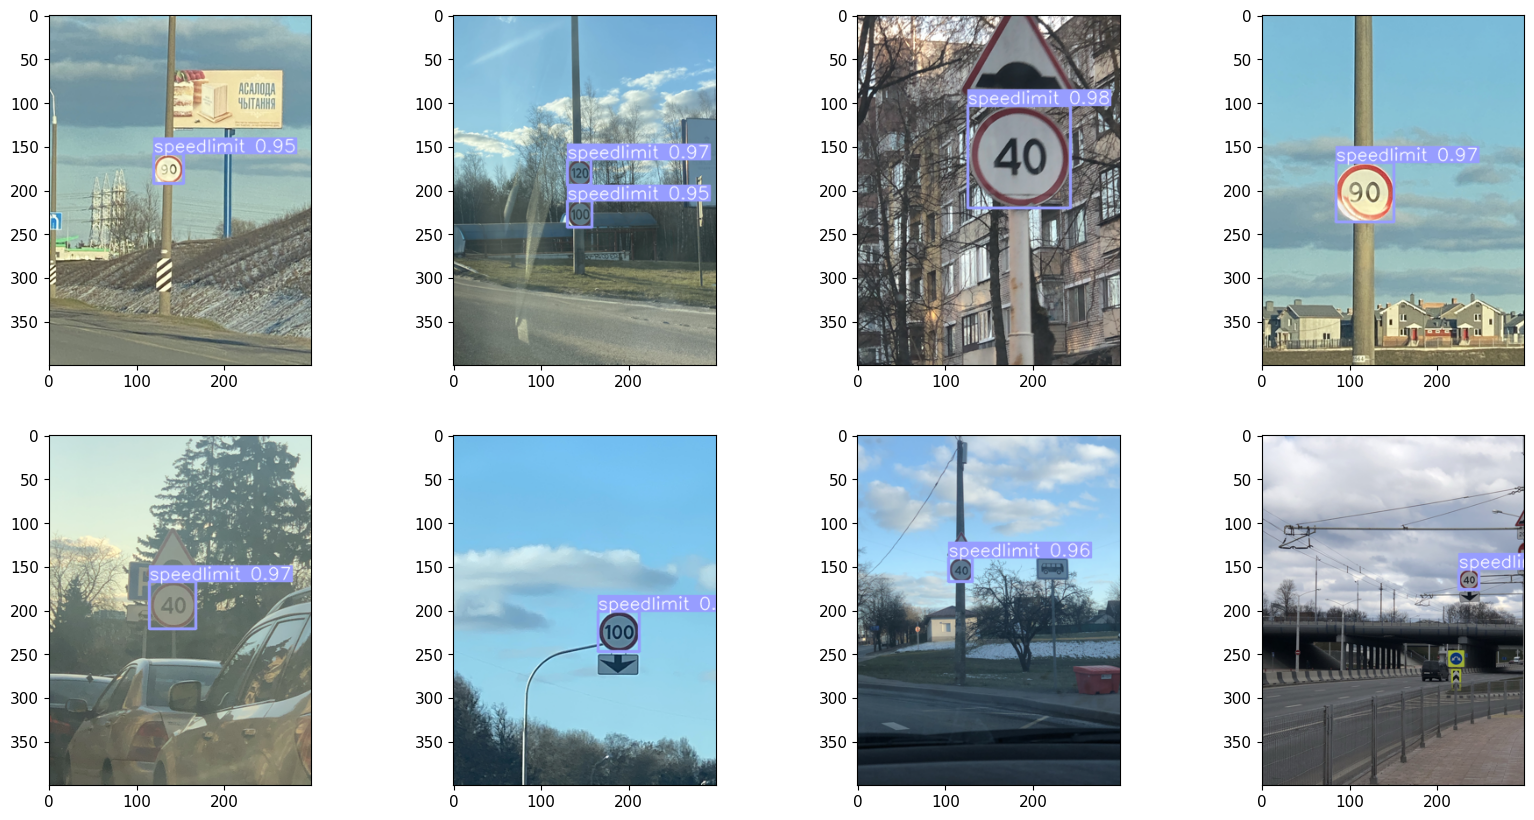

In [20]:
%matplotlib inline

# Create a 2x4 grid of plots with a total size of (20,10) for displaying images with detections
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Get a list of all filenames in the './data/images/' directory
imgs = os.listdir('./data/images')

# Loop over a 2x4 grid using indices generated by itertools.product
for idx in itertools.product(range(2), range(4)):
    
    # Randomly select an image name from the 'imgs' list for display
    imgname = np.random.choice(imgs)
    
    # Read the selected image using OpenCV (Note: OpenCV reads images in BGR format)
    img = cv2.imread(f'./data/images/{imgname}')
    
    # Use the pretrained YOLOv5 model to detect objects in the image
    results = model(img)
    
    # Render the detection results on the image and display it on the corresponding subplot in the grid
    # The image is converted from BGR to RGB format for correct color visualization in Matplotlib
    ax[idx[0], idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))


